# 1.Create a CNN model for binary class problems.

# Import required libraries

In [2]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# Image Augmentation

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#create an image instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train data fetching from the directory of images
batch_size = 16
train_data = train_datagen.flow_from_directory(
    'C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/training_set/training_set',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

# Test data fetching from the directory of images
test_data = test_datagen.flow_from_directory(
    'C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/test_set/test_set',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)


Found 367 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


# Build a CNN model

In [4]:
model=Sequential()
#1st convolution layer
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#2nd convolution layer
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#3rd convolution layer
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
#converting multi dimension to 1 d array
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))
#output layer
model.add(Dense(units=1,activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 32)       

# Compile the cnn model

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Run the CNN Model

In [7]:
result=model.fit(train_data,
 steps_per_epoch=48//batch_size,epochs=30,
 validation_data=test_data,
 validation_steps=48//batch_size

 )

Epoch 1/30
3/3 [==============================] - 6s 2s/step - loss: 1.0119 - accuracy: 0.4681 - val_loss: 0.9592 - val_accuracy: 0.5417
Epoch 2/30
3/3 [==============================] - 2s 854ms/step - loss: 0.7572 - accuracy: 0.5417 - val_loss: 0.7142 - val_accuracy: 0.4167
Epoch 3/30
3/3 [==============================] - 2s 753ms/step - loss: 0.7024 - accuracy: 0.4792 - val_loss: 0.6932 - val_accuracy: 0.5833
Epoch 4/30
3/3 [==============================] - 2s 731ms/step - loss: 0.6991 - accuracy: 0.5000 - val_loss: 0.6971 - val_accuracy: 0.3542
Epoch 5/30
3/3 [==============================] - 2s 699ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.7234 - val_accuracy: 0.4375
Epoch 6/30
3/3 [==============================] - 2s 626ms/step - loss: 0.6724 - accuracy: 0.5417 - val_loss: 0.7173 - val_accuracy: 0.4792
Epoch 7/30
3/3 [==============================] - 2s 637ms/step - loss: 0.7484 - accuracy: 0.3958 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 8/30
3/3 [=======

# Plot for Train & Test Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


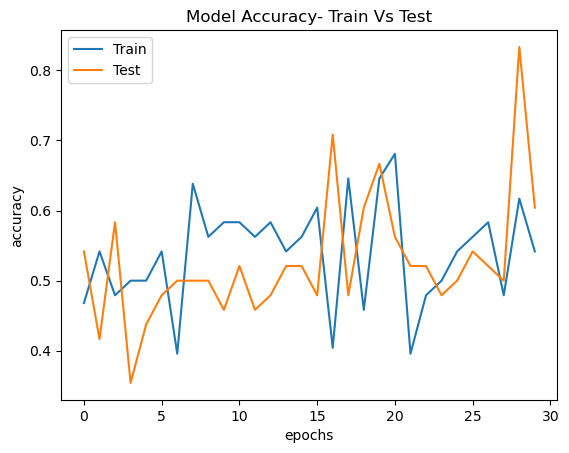

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()


# Plot for Train & Test Loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


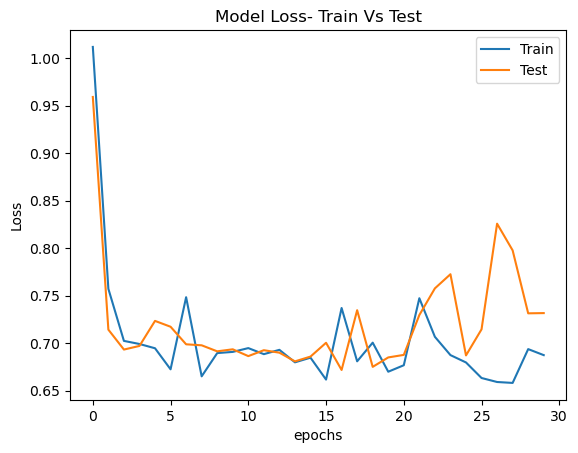

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()


# Run Inference on new image

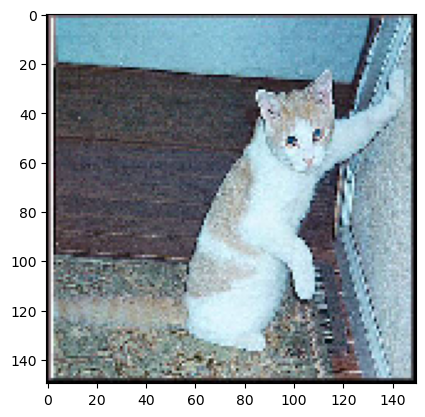

In [14]:
img=load_img('C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/test_set/test_set/cats/cat.4001.jpg',
 target_size=(150,150))
plt.imshow(img)


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100*(1-score):.2f}% cat and {100 * score:.2f}% dog")


1/1 [==============================] - 0s 259ms/step
This image is 100.00% cat and 0.00% dog


In [18]:
from keras.preprocessing import image
import numpy as np
unseen=image.img_to_array(img)
unseen=np.expand_dims(unseen,axis=0)
result=model.predict(unseen)

1/1 [==============================] - 0s 58ms/step


# 2.Build a multiclass classification model using CNN

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [33]:
# Constants
batch_size = 64
num_classes = 10
epochs = 5  

In [34]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [35]:
# Downsampling the dataset
sample_size = 10000
x_train = x_train[:sample_size]
y_train = y_train[:sample_size]
x_test = x_test[:int(sample_size/5)]
y_test = y_test[:int(sample_size/5)]

In [36]:
# Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [37]:
# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [49]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [50]:
# Training the model and storing history
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/5
157/157 [==============================] - 12s 67ms/step - loss: 0.8778 - accuracy: 0.6856 - val_loss: 1.0576 - val_accuracy: 0.6260
Epoch 2/5
157/157 [==============================] - 10s 66ms/step - loss: 0.8345 - accuracy: 0.7046 - val_loss: 1.0432 - val_accuracy: 0.6305
Epoch 3/5
157/157 [==============================] - 10s 66ms/step - loss: 0.7863 - accuracy: 0.7205 - val_loss: 1.0623 - val_accuracy: 0.6230
Epoch 4/5
157/157 [==============================] - 10s 65ms/step - loss: 0.7635 - accuracy: 0.7315 - val_loss: 1.0317 - val_accuracy: 0.6405
Epoch 5/5
157/157 [==============================] - 10s 64ms/step - loss: 0.7055 - accuracy: 0.7536 - val_loss: 1.0329 - val_accuracy: 0.6505


In [51]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0329124927520752
Test accuracy: 0.6504999995231628


In [54]:
#training history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

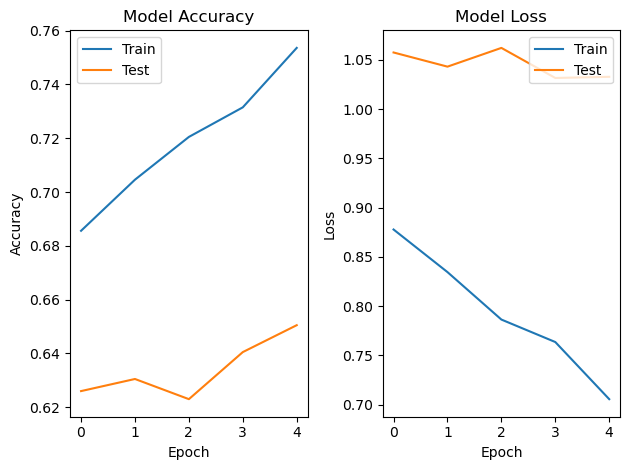

In [56]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()